In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from pmwd import (
    Configuration,
    Cosmology,
    boltzmann,
    white_noise, linear_modes,
    lpt,
    nbody,
    scatter,
)
import pmwd
import jax
import numpy as np
import os
os.environ['OPENBLAS_NUM_THREADS'] = '16'

In [6]:
L = 3000  # Mpc/h
N = 384  # number of grid points
supersampling = 1
ptcl_spacing = L / N
ptcl_grid_shape = (N,)*3
conf = Configuration(ptcl_spacing, ptcl_grid_shape,
                     mesh_shape=supersampling)

In [7]:
seed = 12
modes = white_noise(seed, conf)

In [9]:
M = 512
x = np.random.randn(512, 512, 512)
m = np.fft.rfftn(x)

In [10]:
y = np.fft.irfftn(m)

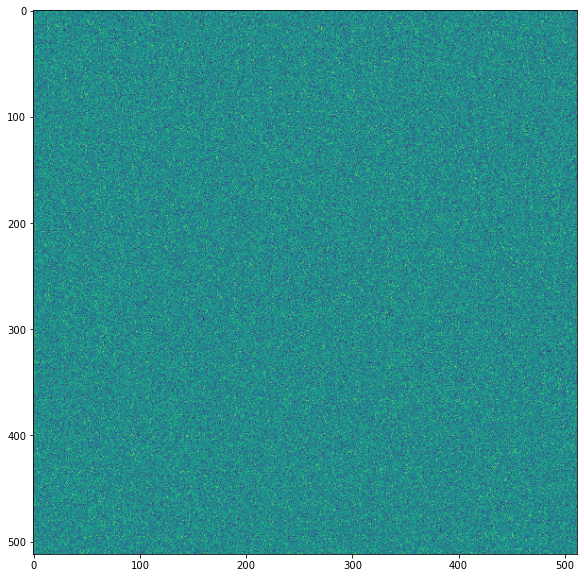

In [20]:
plt.figure(figsize=(10, 10))
plt.imshow(x[0])

In [28]:
path = './data/borg-quijote/latin_hypercube_HR-L1000-N128/4/rho.npy'
l = np.load(path)

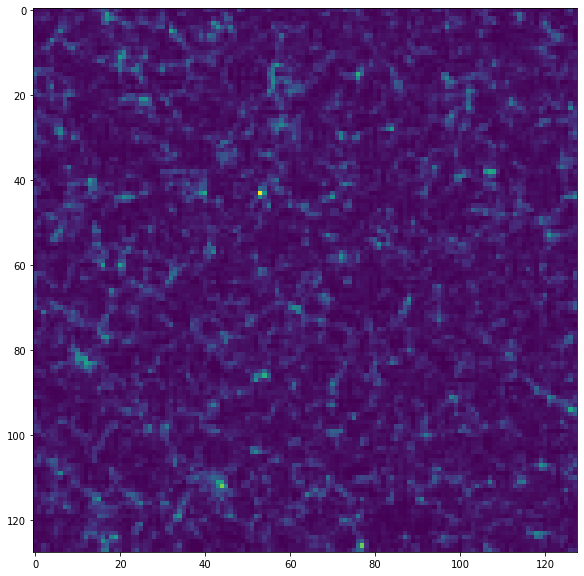

In [29]:
plt.figure(figsize=(10, 10))
plt.imshow(l[0])

In [37]:
path = './data/jaxlpt-quijote/latin_hypercube_HR-L1000-N128/4/rho.npy'
j = np.load(path)

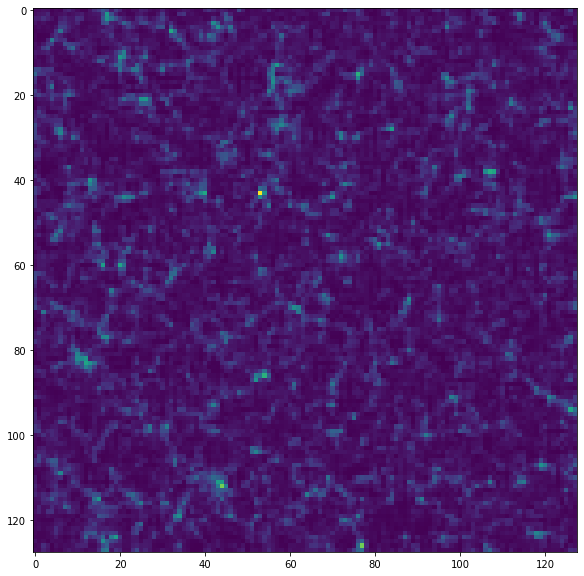

In [38]:
plt.figure(figsize=(10, 10))
plt.imshow(j[0])

In [39]:
path = './data/pmwd-quijote/latin_hypercube_HR-L1000-N128/4/rho.npy'
p = np.load(path)

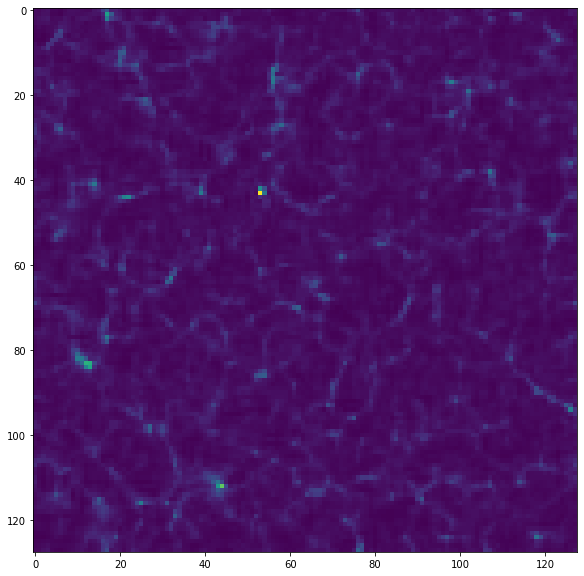

In [40]:
plt.figure(figsize=(10, 10))
plt.imshow(p[0])

In [41]:
path = './data/quijote/source/density_field/latin_hypercube/4/df_m_128_z=0.npy'
r = np.load(path)

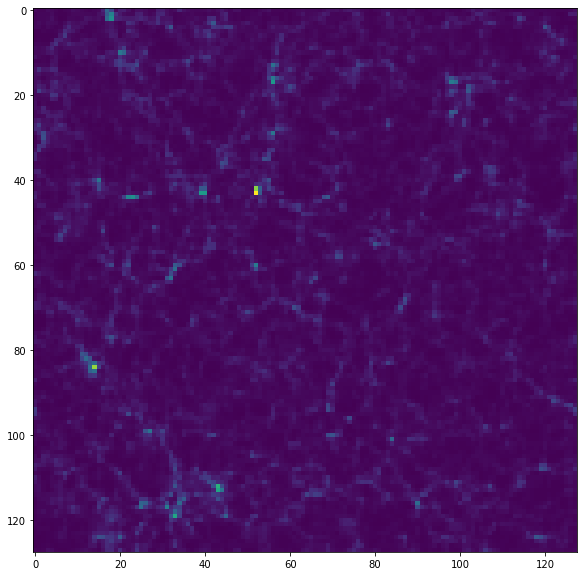

In [42]:
plt.figure(figsize=(10, 10))
plt.imshow(r[0])

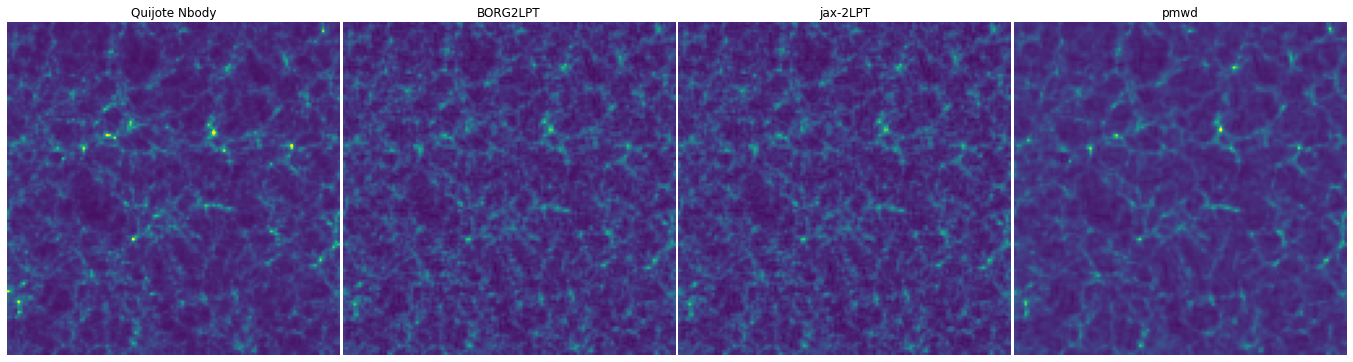

In [46]:
f, axs = plt.subplots(1, 4, figsize=(24, 10), gridspec_kw={'wspace': 0.01})

axs[0].imshow(np.mean(r[50:60], axis=0), vmin=-1, vmax=5)
axs[0].axis('off')
axs[0].set_title('Quijote Nbody')

axs[1].imshow(np.mean(l[50:60], axis=0), vmin=-1, vmax=5)
axs[1].axis('off')
axs[1].set_title('BORG2LPT')

axs[2].imshow(np.mean(j[50:60], axis=0), vmin=-1, vmax=5)
axs[2].axis('off')
axs[2].set_title('jax-2LPT')

axs[3].imshow(np.mean(p[50:60]-1, axis=0), vmin=-1, vmax=5)
axs[3].axis('off')
axs[3].set_title('pmwd')
f.savefig('images/simcompare.jpg', dpi=400, bbox_inches='tight')

In [20]:
r.min()

-0.9174982

## test velocity comparison

In [2]:
%load_ext autoreload
%autoreload 2

import os # noqa
os.environ['OPENBLAS_NUM_THREADS'] = '16' # noqa

from os.path import join as pjoin
import matplotlib.pyplot as plt
import jax
import numpy as np
import pandas as pd

from test import *

In [3]:
lhs = np.loadtxt('latin_hypercube_params_bonus.txt')[:100]
pd.DataFrame(lhs).head(40)

,0,1,2,3,4
0,0.1755,0.06681,0.7737,0.8849,0.6641
1,0.2139,0.05557,0.8599,0.9785,0.8619
2,0.1867,0.04503,0.6189,0.8307,0.7187
3,0.3271,0.06875,0.6313,0.8135,0.8939
4,0.1433,0.06347,0.6127,1.1501,0.7699
5,0.4813,0.05637,0.5331,0.9041,0.9289
6,0.4149,0.04539,0.5761,0.9911,0.6283
7,0.2423,0.06275,0.5675,0.8305,0.7145
8,0.3215,0.05487,0.6429,1.0531,0.7509
9,0.4197,0.05329,0.5265,0.9665,0.6233


In [8]:
lhid=0
datadir = f'./data/borg-quijote/latin_hypercube_HR-L3000-N384/{lhid}'
rho = np.load(pjoin(datadir, 'rho.npy'))
ppos = np.load(pjoin(datadir, 'ppos.npy'))
pvel = np.load(pjoin(datadir, 'pvel.npy'))
hpos = np.load(pjoin(datadir, 'halo_pos.npy'))
hvel = np.load(pjoin(datadir, 'halo_vel.npy'))

ppos = ppos[::]
pvel = pvel[::]

print(rho.shape)
print(ppos.shape)
print(pvel.shape)
print(hpos.shape)
print(hvel.shape)

cosmo = np.loadtxt('latin_hypercube_params_bonus.txt')[lhid]
omega_m = cosmo[0]
print(cosmo)

(384, 384, 384)
(56623104, 3)
(56623104, 3)
(5840337, 3)
(5840337, 3)
[0.175 0.067 0.774 0.885 0.664]


In [9]:
pvel.min(axis=0), pvel.max(axis=0)

(array([-2026.327, -1874.442, -1910.376]),
 array([1844.316, 1759.317, 1855.869]))

In [ ]:
vgrid = get_vgrid(rho, jnp.int64(3000), 9., f=omega_m ** 0.45)
vnorm = np.linalg.norm(vgrid, axis=0)

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [ ]:
# plot a slice of rho and vnorm
f, axs = plt.subplots(1, 2, figsize=(13, 5))
axs[0].imshow(np.mean(rho[100:120, :100, :100], axis=0))
im = axs[1].imshow(np.mean(vnorm[100:120, :100, :100], axis=0))
plt.colorbar(im)

In [76]:
origin = [3000,]*3
halo_v = interp_field(vgrid,
                      hpos,
                      jnp.int64(3000),
                      origin,
                      order=1
                      )
field_v = halo_v.T[:10000]

In [77]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=6, leaf_size=1000,
                          algorithm='ball_tree', weights='distance', n_jobs=-1)
knn.fit(ppos, pvel)

KNeighborsRegressor(algorithm='ball_tree', leaf_size=1000, n_jobs=-1,
                    n_neighbors=6, weights='distance')

In [78]:
knn_v = knn.predict(hpos[:10000])

Text(0.5, 1.0, '$\\Omega_m = 0.3215$, $\\Omega_b = 0.05487$, $h = 0.6429$, $n_s = 1.0531$, $\\sigma_8 = 0.7509$')

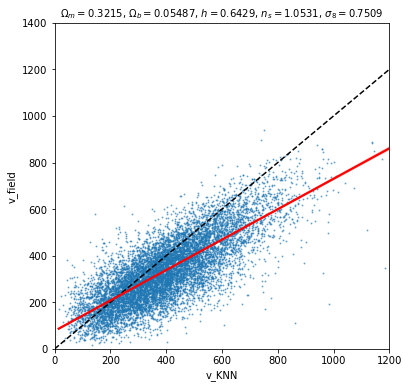

In [79]:
import seaborn as sns
import pandas as pd

a = np.linalg.norm(knn_v, axis=1)
b = np.linalg.norm(field_v, axis=1)

# create a pandas dataframe
df = pd.DataFrame({'v_KNN': a, 'v_field': b})

# create a jointplot
f, ax = plt.subplots(figsize=(6, 6))
ax.plot([0,1200], [0,1200], 'k--')
jp = sns.regplot(data=df, x='v_KNN', y='v_field', ax=ax,
                 scatter_kws={'s': 1, 'alpha': 0.5},
                 line_kws={'color': 'red'})

ax.set_xlim(0, 1200)
ax.set_ylim(0, 1400)
ax.set_title(f'$\Omega_m = {cosmo[0]}$, '
             f'$\Omega_b = {cosmo[1]}$, '
             f'$h = {cosmo[2]}$, '
             f'$n_s = {cosmo[3]}$, '
             f'$\sigma_8 = {cosmo[4]}$',
             fontsize=10
             )

In [80]:
# regress a,b and print the coefficient

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(a.reshape(-1,1),b)
print(lr.coef_)

[0.65308759]


In [20]:
import tqdm

# coefs = []
# oms = []
for lhid in tqdm.tqdm(range(30, 60)):
    datadir = f'./data/borg-quijote/latin_hypercube_HR-L3000-N384/{lhid}'
    rho = np.load(pjoin(datadir, 'rho.npy'))
    ppos = np.load(pjoin(datadir, 'ppos.npy'))
    pvel = np.load(pjoin(datadir, 'pvel.npy'))
    hpos = np.load(pjoin(datadir, 'halo_pos.npy'))

    ppos = ppos[::500]
    pvel = pvel[::500]

    cosmo = np.loadtxt('latin_hypercube_params_bonus.txt')[lhid]
    omega_m = cosmo[0]
    print(lhid, cosmo)

    # vfield
    vgrid = get_vgrid(rho, jnp.int64(3000), 9., f=omega_m ** 0.55)
    vnorm = np.linalg.norm(vgrid, axis=0)
    origin = [3000,]*3
    halo_v = interp_field(vgrid,
                        hpos,
                        jnp.int64(3000),
                        origin,
                        order=1
                        )
    field_v = halo_v.T[:10000]

    # vknn
    knn = KNeighborsRegressor(n_neighbors=6, leaf_size=1000,
                            algorithm='ball_tree', weights='distance', n_jobs=-1)
    knn.fit(ppos, pvel)
    knn_v = knn.predict(hpos[:10000])

    a = np.linalg.norm(knn_v, axis=1)
    b = np.linalg.norm(field_v, axis=1)
    lr = LinearRegression()
    lr.fit(a.reshape(-1,1),b)

    coefs.append(lr.coef_)
    oms.append(omega_m)

  0%|          | 0/30 [00:00<?, ?it/s]

30 [0.1931  0.06181 0.8337  1.0579  0.6263 ]


/data80/mattho/anaconda3/envs/jax/lib/python3.11/site-packages/jax/_src/numpy/lax_numpy.py:146: UserWarning: Explicitly requested dtype int64 requested in asarray is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return asarray(x, dtype=self.dtype)
  3%|▎         | 1/30 [00:52<25:26, 52.65s/it]

31 [0.4083  0.03347 0.6471  1.1835  0.9961 ]


/data80/mattho/anaconda3/envs/jax/lib/python3.11/site-packages/jax/_src/numpy/lax_numpy.py:146: UserWarning: Explicitly requested dtype int64 requested in asarray is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return asarray(x, dtype=self.dtype)
  7%|▋         | 2/30 [01:44<24:27, 52.40s/it]

32 [0.3211  0.06893 0.5043  0.8627  0.9241 ]


/data80/mattho/anaconda3/envs/jax/lib/python3.11/site-packages/jax/_src/numpy/lax_numpy.py:146: UserWarning: Explicitly requested dtype int64 requested in asarray is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return asarray(x, dtype=self.dtype)
 10%|█         | 3/30 [02:35<23:16, 51.71s/it]

33 [0.3507  0.04683 0.8961  1.0289  0.9049 ]


/data80/mattho/anaconda3/envs/jax/lib/python3.11/site-packages/jax/_src/numpy/lax_numpy.py:146: UserWarning: Explicitly requested dtype int64 requested in asarray is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return asarray(x, dtype=self.dtype)
 13%|█▎        | 4/30 [03:27<22:26, 51.79s/it]

34 [0.2311  0.05531 0.8569  0.8659  0.8641 ]


/data80/mattho/anaconda3/envs/jax/lib/python3.11/site-packages/jax/_src/numpy/lax_numpy.py:146: UserWarning: Explicitly requested dtype int64 requested in asarray is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return asarray(x, dtype=self.dtype)
 17%|█▋        | 5/30 [04:19<21:36, 51.88s/it]

35 [0.1729  0.05025 0.5325  0.9745  0.9405 ]


/data80/mattho/anaconda3/envs/jax/lib/python3.11/site-packages/jax/_src/numpy/lax_numpy.py:146: UserWarning: Explicitly requested dtype int64 requested in asarray is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return asarray(x, dtype=self.dtype)
 20%|██        | 6/30 [05:11<20:43, 51.82s/it]

36 [0.3779  0.04379 0.7925  0.9955  0.7875 ]


/data80/mattho/anaconda3/envs/jax/lib/python3.11/site-packages/jax/_src/numpy/lax_numpy.py:146: UserWarning: Explicitly requested dtype int64 requested in asarray is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return asarray(x, dtype=self.dtype)
 23%|██▎       | 7/30 [06:01<19:35, 51.13s/it]

37 [0.4655  0.06045 0.6013  1.1437  0.7933 ]


/data80/mattho/anaconda3/envs/jax/lib/python3.11/site-packages/jax/_src/numpy/lax_numpy.py:146: UserWarning: Explicitly requested dtype int64 requested in asarray is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return asarray(x, dtype=self.dtype)
 27%|██▋       | 8/30 [06:52<18:49, 51.36s/it]

38 [0.3889  0.03627 0.6275  0.9513  0.9137 ]


/data80/mattho/anaconda3/envs/jax/lib/python3.11/site-packages/jax/_src/numpy/lax_numpy.py:146: UserWarning: Explicitly requested dtype int64 requested in asarray is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return asarray(x, dtype=self.dtype)
 30%|███       | 9/30 [07:43<17:51, 51.04s/it]

39 [0.3363  0.04133 0.8693  1.0869  0.9593 ]


/data80/mattho/anaconda3/envs/jax/lib/python3.11/site-packages/jax/_src/numpy/lax_numpy.py:146: UserWarning: Explicitly requested dtype int64 requested in asarray is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return asarray(x, dtype=self.dtype)
 33%|███▎      | 10/30 [08:35<17:07, 51.38s/it]

40 [0.4275  0.04703 0.5823  1.1043  0.9403 ]


/data80/mattho/anaconda3/envs/jax/lib/python3.11/site-packages/jax/_src/numpy/lax_numpy.py:146: UserWarning: Explicitly requested dtype int64 requested in asarray is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return asarray(x, dtype=self.dtype)
 37%|███▋      | 11/30 [09:27<16:19, 51.55s/it]

41 [0.3747  0.05499 0.5585  1.1007  0.9293 ]


/data80/mattho/anaconda3/envs/jax/lib/python3.11/site-packages/jax/_src/numpy/lax_numpy.py:146: UserWarning: Explicitly requested dtype int64 requested in asarray is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return asarray(x, dtype=self.dtype)
 40%|████      | 12/30 [10:17<15:17, 50.96s/it]

42 [0.1315  0.05027 0.5607  1.0309  0.8747 ]


/data80/mattho/anaconda3/envs/jax/lib/python3.11/site-packages/jax/_src/numpy/lax_numpy.py:146: UserWarning: Explicitly requested dtype int64 requested in asarray is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return asarray(x, dtype=self.dtype)
 43%|████▎     | 13/30 [11:07<14:24, 50.83s/it]

43 [0.1749  0.04751 0.8931  1.0089  0.8759 ]


/data80/mattho/anaconda3/envs/jax/lib/python3.11/site-packages/jax/_src/numpy/lax_numpy.py:146: UserWarning: Explicitly requested dtype int64 requested in asarray is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return asarray(x, dtype=self.dtype)
 47%|████▋     | 14/30 [11:58<13:34, 50.93s/it]

44 [0.3613  0.03909 0.8951  0.9393  0.8379 ]


/data80/mattho/anaconda3/envs/jax/lib/python3.11/site-packages/jax/_src/numpy/lax_numpy.py:146: UserWarning: Explicitly requested dtype int64 requested in asarray is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return asarray(x, dtype=self.dtype)
 50%|█████     | 15/30 [12:49<12:42, 50.81s/it]

45 [0.2115  0.06065 0.8225  0.9273  0.8087 ]


/data80/mattho/anaconda3/envs/jax/lib/python3.11/site-packages/jax/_src/numpy/lax_numpy.py:146: UserWarning: Explicitly requested dtype int64 requested in asarray is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return asarray(x, dtype=self.dtype)
 53%|█████▎    | 16/30 [13:40<11:54, 51.03s/it]

46 [0.4435  0.04551 0.8487  0.8725  0.7351 ]


/data80/mattho/anaconda3/envs/jax/lib/python3.11/site-packages/jax/_src/numpy/lax_numpy.py:146: UserWarning: Explicitly requested dtype int64 requested in asarray is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return asarray(x, dtype=self.dtype)
 57%|█████▋    | 17/30 [14:31<11:03, 51.07s/it]

47 [0.2791  0.04967 0.5755  0.9601  0.7955 ]


/data80/mattho/anaconda3/envs/jax/lib/python3.11/site-packages/jax/_src/numpy/lax_numpy.py:146: UserWarning: Explicitly requested dtype int64 requested in asarray is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return asarray(x, dtype=self.dtype)
 60%|██████    | 18/30 [15:22<10:12, 51.05s/it]

48 [0.4705  0.06865 0.7573  0.9833  0.6703 ]


/data80/mattho/anaconda3/envs/jax/lib/python3.11/site-packages/jax/_src/numpy/lax_numpy.py:146: UserWarning: Explicitly requested dtype int64 requested in asarray is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return asarray(x, dtype=self.dtype)
 63%|██████▎   | 19/30 [16:14<09:24, 51.30s/it]

49 [0.3915  0.05877 0.6241  0.9763  0.7073 ]


/data80/mattho/anaconda3/envs/jax/lib/python3.11/site-packages/jax/_src/numpy/lax_numpy.py:146: UserWarning: Explicitly requested dtype int64 requested in asarray is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return asarray(x, dtype=self.dtype)
 67%|██████▋   | 20/30 [17:06<08:35, 51.55s/it]

50 [0.2053  0.05387 0.8221  0.8977  0.8727 ]


/data80/mattho/anaconda3/envs/jax/lib/python3.11/site-packages/jax/_src/numpy/lax_numpy.py:146: UserWarning: Explicitly requested dtype int64 requested in asarray is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return asarray(x, dtype=self.dtype)
 70%|███████   | 21/30 [18:02<07:54, 52.68s/it]

51 [0.3485  0.05107 0.7283  1.1187  0.7655 ]


/data80/mattho/anaconda3/envs/jax/lib/python3.11/site-packages/jax/_src/numpy/lax_numpy.py:146: UserWarning: Explicitly requested dtype int64 requested in asarray is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return asarray(x, dtype=self.dtype)
 73%|███████▎  | 22/30 [18:57<07:08, 53.55s/it]

52 [0.4267  0.04623 0.6405  0.9515  0.9419 ]


/data80/mattho/anaconda3/envs/jax/lib/python3.11/site-packages/jax/_src/numpy/lax_numpy.py:146: UserWarning: Explicitly requested dtype int64 requested in asarray is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return asarray(x, dtype=self.dtype)
 77%|███████▋  | 23/30 [19:52<06:16, 53.78s/it]

53 [0.2917  0.06289 0.7935  0.8467  0.8459 ]


/data80/mattho/anaconda3/envs/jax/lib/python3.11/site-packages/jax/_src/numpy/lax_numpy.py:146: UserWarning: Explicitly requested dtype int64 requested in asarray is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return asarray(x, dtype=self.dtype)
 80%|████████  | 24/30 [20:45<05:22, 53.68s/it]

54 [0.2189  0.04859 0.8157  0.8663  0.8599 ]


/data80/mattho/anaconda3/envs/jax/lib/python3.11/site-packages/jax/_src/numpy/lax_numpy.py:146: UserWarning: Explicitly requested dtype int64 requested in asarray is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return asarray(x, dtype=self.dtype)
 83%|████████▎ | 25/30 [21:39<04:28, 53.60s/it]

55 [0.1765  0.05935 0.7871  1.1999  0.9797 ]


/data80/mattho/anaconda3/envs/jax/lib/python3.11/site-packages/jax/_src/numpy/lax_numpy.py:146: UserWarning: Explicitly requested dtype int64 requested in asarray is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return asarray(x, dtype=self.dtype)
 87%|████████▋ | 26/30 [22:32<03:34, 53.67s/it]

56 [0.4255  0.06925 0.7373  1.1381  0.8501 ]


/data80/mattho/anaconda3/envs/jax/lib/python3.11/site-packages/jax/_src/numpy/lax_numpy.py:146: UserWarning: Explicitly requested dtype int64 requested in asarray is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return asarray(x, dtype=self.dtype)
 90%|█████████ | 27/30 [23:29<02:43, 54.62s/it]

57 [0.3701  0.03555 0.8955  1.1551  0.7131 ]


/data80/mattho/anaconda3/envs/jax/lib/python3.11/site-packages/jax/_src/numpy/lax_numpy.py:146: UserWarning: Explicitly requested dtype int64 requested in asarray is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return asarray(x, dtype=self.dtype)
 93%|█████████▎| 28/30 [24:25<01:49, 54.92s/it]

58 [0.2449  0.04145 0.6363  1.0723  0.8665 ]


/data80/mattho/anaconda3/envs/jax/lib/python3.11/site-packages/jax/_src/numpy/lax_numpy.py:146: UserWarning: Explicitly requested dtype int64 requested in asarray is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return asarray(x, dtype=self.dtype)
 97%|█████████▋| 29/30 [25:32<00:58, 58.46s/it]

59 [0.2641  0.04791 0.7859  1.1137  0.9015 ]


/data80/mattho/anaconda3/envs/jax/lib/python3.11/site-packages/jax/_src/numpy/lax_numpy.py:146: UserWarning: Explicitly requested dtype int64 requested in asarray is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return asarray(x, dtype=self.dtype)
100%|██████████| 30/30 [26:26<00:00, 52.89s/it]


[-0.36570014]
[-0.66465479]


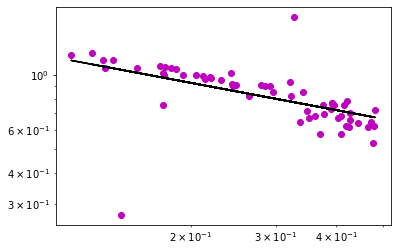

In [26]:
# plot om and coefs
plt.loglog()
plt.plot(oms, coefs, 'mo')

lr = LinearRegression().fit(np.log(oms).reshape(-1, 1), np.log(coefs))
print(lr.coef_[0])
print(lr.intercept_)

plt.plot(oms, np.exp(lr.intercept_) * oms**lr.coef_[0], 'k-')


$$f = \Omega_m^{0.55}$$
$$v_{field} \propto C f v_{true}$$
$$v_{field} = m v_{true}$$
\log m = D \log \Omega_m

In [4]:
0.55-0.36

0.19000000000000006